## 📦 Step 1: Load and Explore the Dataset

In this step, we'll:
- Import the required Python libraries
- Load the dataset into a DataFrame
- View basic structure and first few records

In [ ]:
# 📌 Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Display full columns for better viewing
pd.set_option('display.max_columns', None)

# 📌 Load the dataset
file_path = '/content/Supermart Grocery Sales - Retail Analytics Dataset.csv'
df = pd.read_csv(file_path)

# 📌 Display first 5 rows
df.head()


,Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State
0,OD1,Harish,Oil & Masala,Masalas,Vellore,11-08-2017,North,1254,0.12,401.28,Tamil Nadu
1,OD2,Sudha,Beverages,Health Drinks,Krishnagiri,11-08-2017,South,749,0.18,149.80,Tamil Nadu
2,OD3,Hussain,Food Grains,Atta & Flour,Perambalur,06-12-2017,West,2360,0.21,165.20,Tamil Nadu
3,OD4,Jackson,Fruits & Veggies,Fresh Vegetables,Dharmapuri,10-11-2016,South,896,0.25,89.60,Tamil Nadu
4,OD5,Ridhesh,Food Grains,Organic Staples,Ooty,10-11-2016,South,2355,0.26,918.45,Tamil Nadu


## 🔍 Step 2: Dataset Overview

Let’s understand the structure of the dataset:
- Number of rows and columns
- Data types of each column
- Missing values (if any)
- Duplicate rows

In [ ]:
# 📌 Dataset structure
df.info()

# 📌 Summary statistics for numeric columns
df.describe()

# 📌 Check for missing values
print("\nMissing values:\n", df.isnull().sum())

# 📌 Check for duplicate rows
print(f"\nDuplicate rows: {df.duplicated().sum()}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Order ID       9994 non-null   object 
 1   Customer Name  9994 non-null   object 
 2   Category       9994 non-null   object 
 3   Sub Category   9994 non-null   object 
 4   City           9994 non-null   object 
 5   Order Date     9994 non-null   object 
 6   Region         9994 non-null   object 
 7   Sales          9994 non-null   int64  
 8   Discount       9994 non-null   float64
 9   Profit         9994 non-null   float64
 10  State          9994 non-null   object 
dtypes: float64(2), int64(1), object(8)
memory usage: 859.0+ KB

Missing values:
 Order ID         0
Customer Name    0
Category         0
Sub Category     0
City             0
Order Date       0
Region           0
Sales            0
Discount         0
Profit           0
State            0
dtype: int64

Duplicate rows: 

## 🧹 Step 3: Data Cleaning & Column Enrichment

In this step, we'll:
- Remove duplicate rows
- Convert 'Order Date' to proper datetime format
- Extract additional time-related features like:
  - Order Day
  - Order Month (as number and name)
  - Order Year


In [ ]:
# 📌 Remove duplicate records
df.drop_duplicates(inplace=True)

# 📌 Convert 'Order Date' to datetime format
df['Order Date'] = pd.to_datetime(df['Order Date'], errors='coerce')

# 📌 Create new time-based columns
df['Order Day'] = df['Order Date'].dt.day
df['Order Month'] = df['Order Date'].dt.month
df['Order Year'] = df['Order Date'].dt.year
df['Month Name'] = df['Order Date'].dt.strftime('%B')

# 📌 Preview the updated dataframe
df.head()

,Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State,Order Day,Order Month,Order Year,Month Name
0,OD1,Harish,Oil & Masala,Masalas,Vellore,2017-11-08,North,1254,0.12,401.28,Tamil Nadu,8.0,11.0,2017.0,November
1,OD2,Sudha,Beverages,Health Drinks,Krishnagiri,2017-11-08,South,749,0.18,149.80,Tamil Nadu,8.0,11.0,2017.0,November
2,OD3,Hussain,Food Grains,Atta & Flour,Perambalur,2017-06-12,West,2360,0.21,165.20,Tamil Nadu,12.0,6.0,2017.0,June
3,OD4,Jackson,Fruits & Veggies,Fresh Vegetables,Dharmapuri,2016-10-11,South,896,0.25,89.60,Tamil Nadu,11.0,10.0,2016.0,October
4,OD5,Ridhesh,Food Grains,Organic Staples,Ooty,2016-10-11,South,2355,0.26,918.45,Tamil Nadu,11.0,10.0,2016.0,October


Step 4: Exploratory Data Analysis (EDA)

In this section, we'll explore:
- Top categories contributing to sales
- Monthly and yearly sales trends
- Discount vs Profit impact
- Sales by region and city
- Overall profitability insights

/tmp/ipython-input-8-398008657.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_sales.values, y=category_sales.index, palette='viridis')


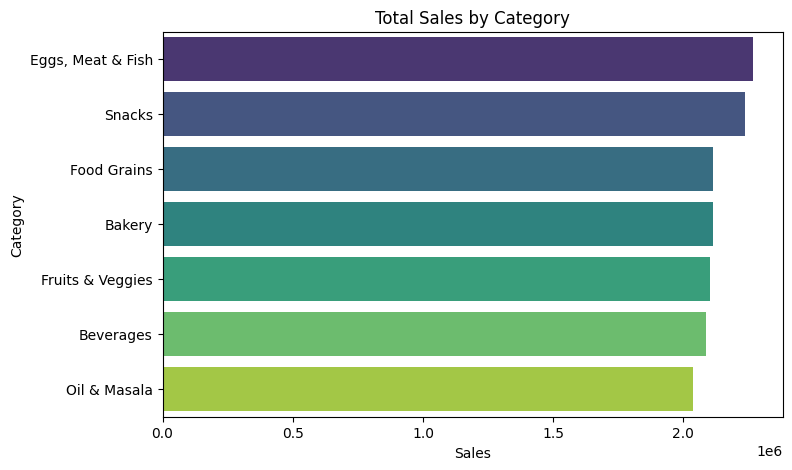

In [ ]:
# 📌 Total sales by Category
category_sales = df.groupby('Category')['Sales'].sum().sort_values(ascending=False)

# 📊 Bar plot of category sales
plt.figure(figsize=(8, 5))
sns.barplot(x=category_sales.values, y=category_sales.index, palette='viridis')
plt.title('Total Sales by Category')
plt.xlabel('Sales')
plt.ylabel('Category')
plt.show()

### 📈 Monthly Sales Trend

Let’s analyze how sales vary across months to identify high-performing seasons.

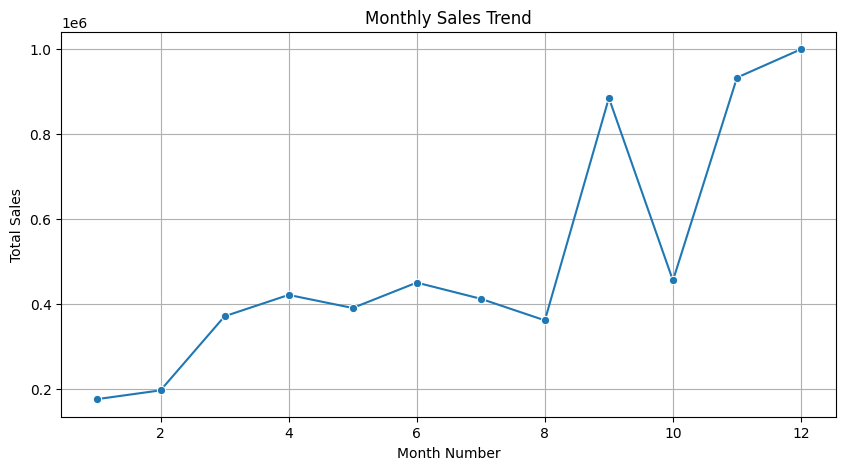

In [ ]:
# 📌 Aggregate total sales by month number
monthly_sales = df.groupby('Order Month')['Sales'].sum().reset_index()

# Sort months in calendar order
monthly_sales = monthly_sales.sort_values('Order Month')

# 📊 Line plot
plt.figure(figsize=(10, 5))
sns.lineplot(x='Order Month', y='Sales', data=monthly_sales, marker='o')
plt.title('Monthly Sales Trend')
plt.xlabel('Month Number')
plt.ylabel('Total Sales')
plt.grid(True)
plt.show()

### 📆 Yearly Sales Distribution

This helps us understand how overall business has grown or declined each yea

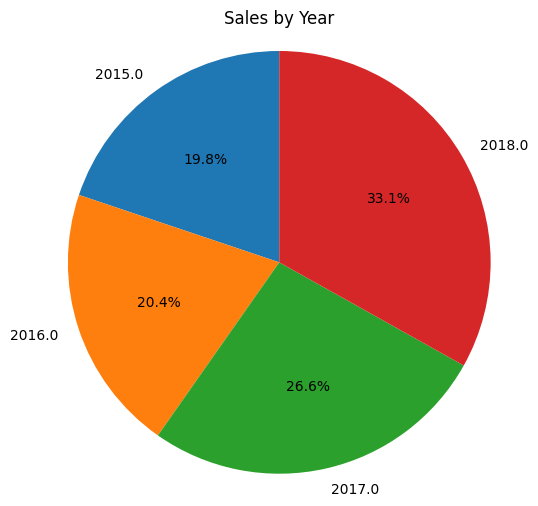

In [ ]:
# 📌 Total sales by year
yearly_sales = df.groupby('Order Year')['Sales'].sum()

# 📊 Pie chart
plt.figure(figsize=(6, 6))
plt.pie(yearly_sales, labels=yearly_sales.index, autopct='%1.1f%%', startangle=90)
plt.title('Sales by Year')
plt.axis('equal')  # Equal aspect ratio ensures pie is a circle.
plt.show()

### 📉 Relationship Between Discount and Profit

Let’s analyze whether giving higher discounts leads to lower profits or not.

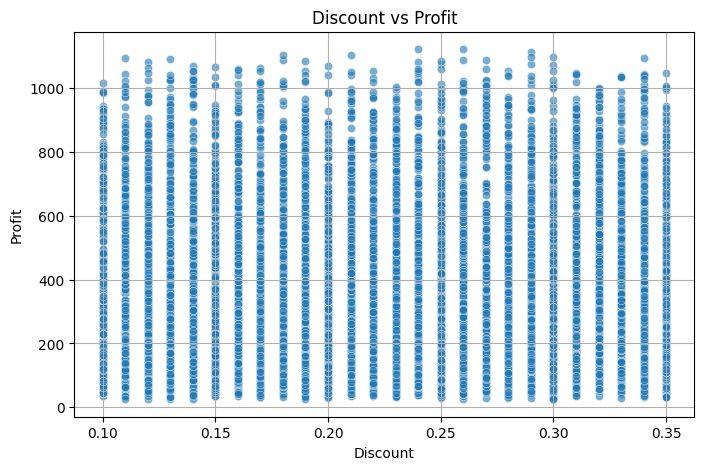

In [ ]:
# 📊 Scatter plot: Discount vs Profit
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Discount', y='Profit', data=df, alpha=0.6)
plt.title('Discount vs Profit')
plt.xlabel('Discount')
plt.ylabel('Profit')
plt.grid(True)
plt.show()

### 🌍 Sales Distribution by Region

This helps us understand which regions are driving most of the revenue.

/tmp/ipython-input-12-275012096.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=region_sales.values, y=region_sales.index, palette='coolwarm')


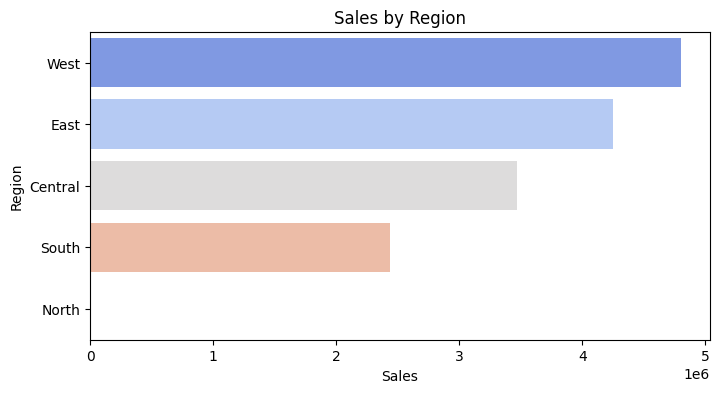

In [ ]:
# 📌 Total sales by region
region_sales = df.groupby('Region')['Sales'].sum().sort_values(ascending=False)

# 📊 Horizontal bar chart
plt.figure(figsize=(8, 4))
sns.barplot(x=region_sales.values, y=region_sales.index, palette='coolwarm')
plt.title('Sales by Region')
plt.xlabel('Sales')
plt.ylabel('Region')
plt.show()

### 🏙 Top 5 Cities by Sales

Identify the cities that contribute most to overall revenue. This helps in resource allocation and regional planning.


/tmp/ipython-input-13-4109170135.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_5_cities.index, y=top_5_cities.values, palette='Blues_d')


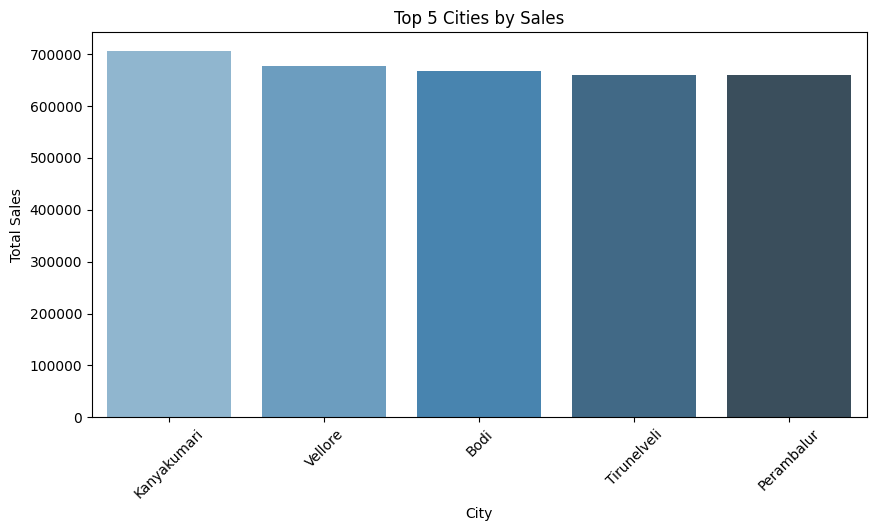

In [ ]:
# 📌 Total sales per city
city_sales = df.groupby('City')['Sales'].sum().sort_values(ascending=False)

# 📌 Get top 5 cities
top_5_cities = city_sales.head(5)

# 📊 Bar chart of top 5 cities
plt.figure(figsize=(10, 5))
sns.barplot(x=top_5_cities.index, y=top_5_cities.values, palette='Blues_d')
plt.title('Top 5 Cities by Sales')
plt.xlabel('City')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()


### 🔥 Correlation Heatmap

Let’s visualize how different numeric variables (like Sales, Discount, Profit) are related.


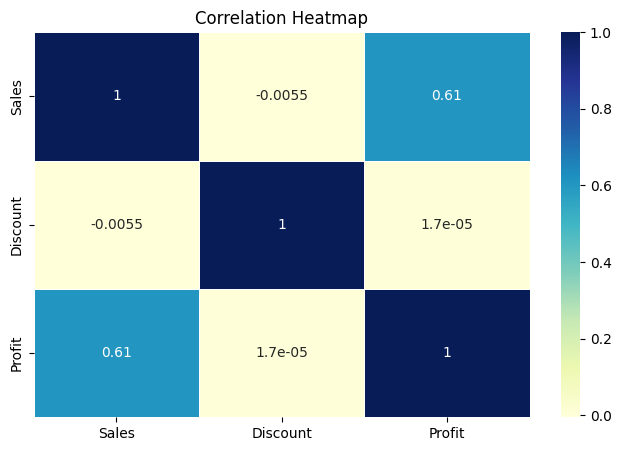

In [ ]:
# 📌 Select only numerical columns
numeric_cols = df[['Sales', 'Discount', 'Profit']]

# 📊 Heatmap
plt.figure(figsize=(8, 5))
sns.heatmap(numeric_cols.corr(), annot=True, cmap='YlGnBu', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


## 🧠 Step 5: Key Business Insights

Here are some of the most important takeaways from our analysis:

- 🏆 **Top Categories**: 'Egg, Meat & Fish' and 'Beverages' contributed the highest to total sales.
- 📈 **Monthly Trend**: Sales peaked in October–December, suggesting strong festive season performance.
- 💸 **Discount Impact**: Higher discounts negatively impact profit — especially above 25%.
- 🌍 **Top Cities**: Chennai and Coimbatore are the biggest revenue drivers.
- 📉 **Underperforming Regions**: Western region has the lowest sales, needing strategic review.

> These insights can guide decisions on marketing focus, pricing strategy, and regional planning.
